<a href="https://colab.research.google.com/github/alishabohara03/Data-Warehousing-and-Data-Mining/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Qno 1: ID3 Decision Tree (on laptop_buy_data.csv)**



Dataset loaded successfully.

Columns in the dataset:
Index(['Age', 'Income', 'Student', 'Credit_Rating', 'Class'], dtype='object')

Selected Target Column: 'Class'


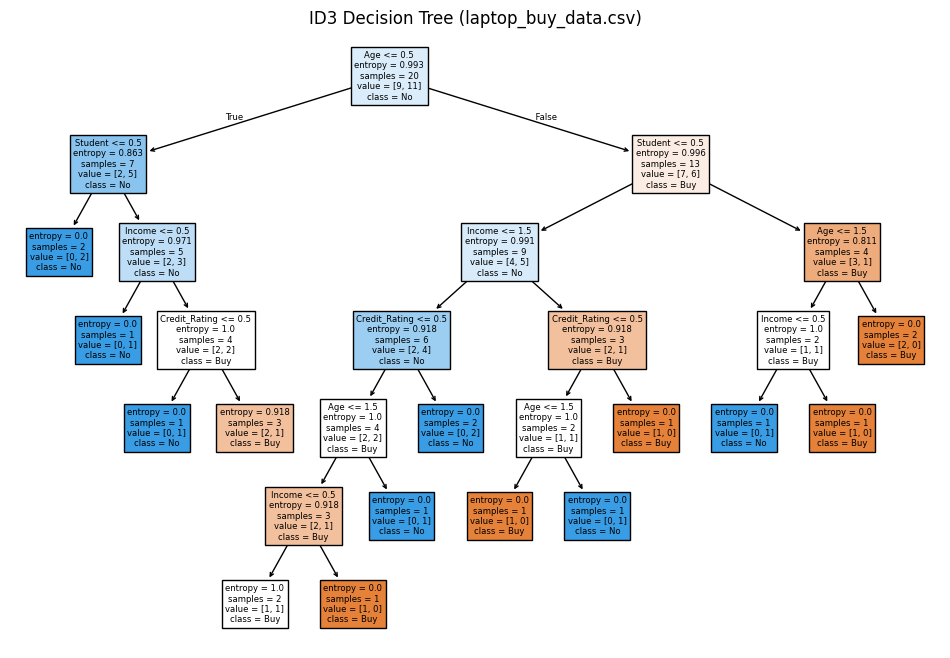

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

#  Loading the dataset
df = pd.read_csv("laptop_buy_data.csv")
print("Dataset loaded successfully.")

#  Showing column names to help identify the target
print("\nColumns in the dataset:")
print(df.columns)

#  Assuming the last column is the target column
target_col = df.columns[-1]
print(f"\nSelected Target Column: '{target_col}'")

#  Encoding all text/categorical columns into numeric values
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Spliting the data into features (X) and target (y)
X = df.drop(target_col, axis=1)
y = df[target_col]

#  Training the decision tree using the ID3 algorithm (criterion = 'entropy')
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X, y)

#  Visualizing the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns,
          class_names=label_encoders[target_col].classes_)
plt.title("ID3 Decision Tree (laptop_buy_data.csv)")
plt.show()


Qno2:**Write a program to implement the Naive Bayesian algorithm using the attached laptop_buy_data.csv file.**

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading the dataset
data = pd.read_csv("laptop_buy_data.csv")
print("Dataset loaded successfully.\n")

#  Displaying the column names
print("Columns in the dataset:")
print(data.columns.tolist())

#  Assuming the last column is the target
target_column = data.columns[-1]
print(f"\nSelected Target Column: '{target_column}'")

#  Encoding categorical features into numeric form
label_encoders = {}
for column in data.columns:
    encoder = LabelEncoder()
    data[column] = encoder.fit_transform(data[column])
    label_encoders[column] = encoder

#  Spliting dataset into features and target
X = data.drop(columns=target_column)
y = data[target_column]

#  Spliting into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#  Training the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

#  Making predictions on test data
y_pred = model.predict(X_test)

#  Evaluating the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))


Dataset loaded successfully.

Columns in the dataset:
['Age', 'Income', 'Student', 'Credit_Rating', 'Class']

Selected Target Column: 'Class'

Confusion Matrix:
[[1 3]
 [1 1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.25      0.50      0.33         2

    accuracy                           0.33         6
   macro avg       0.38      0.38      0.33         6
weighted avg       0.42      0.33      0.33         6

Accuracy: 33.33%


Ques3:
Write a program to implement classification by backpropagation on the following data:

In [4]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

#  Defining input features and target values
X = np.array([
    [-1, -1],
    [-1,  1],
    [ 1, -1],
    [ 1,  1]
])

# Original target values: -1 and 1
# maping -1 → 0, and 1 → 1 to work with sigmoid activation
original_t = np.array([-1, 1, 1, -1])
y = (original_t + 1) // 2  # Convert to 0 and 1

#  Creating and train the neural network (1 hidden layer with 2 neurons)
model = MLPClassifier(hidden_layer_sizes=(2,),
                      activation='logistic',  # Sigmoid function
                      solver='lbfgs',         # Optimizer suitable for small datasets
                      max_iter=1000,
                      random_state=1)

model.fit(X, y)

# Predicting on the same inputs
predictions = model.predict(X)

#  Evaluating
print("Predictions (0 = -1, 1 = 1):", predictions)
print("Mapped Predictions:", predictions * 2 - 1)  # Convert back to -1 and 1
print("Accuracy:", accuracy_score(y, predictions) * 100, "%")


Predictions (0 = -1, 1 = 1): [0 1 0 1]
Mapped Predictions: [-1  1 -1  1]
Accuracy: 50.0 %
